A Buffon-féle tűprobléma a következő: egy sík felületre, melyen egymástól egyenlő
távolságra (d) párhuzamos vonalak találhatók, n darab l (< d) hossúságú tűt ejtünk. Nem
nehéz belátni, hogy egy tűre annak valószínűsége, hogy az valamelyik vonalat érinti,
bizonyos ésszerű feltételezések mellett 2l/dπ. Tehát várhatóan k = 2nl/dπ darab esik
valamelyik vonalra. Ha a kísérletet sok-sok tűvel elvégezzük, π értékére kaphatunk becslést.
Készítsünk ábrát, mely paraméterként adott n,d,l számokra véletlenszerűen leejtett n tűt
ábrázol. A véletlen lehet pl. a következő: a tű közepének x és y koordinátája a -10d és
10d közötti intervallumból, a tű vízszintessel bezárt szöge a 0 és π közötti intervallumból
van egyenletes eloszlás szerint választva. A vonalra eső tűket kék, a többit piros színnel
rajzojuk ki. Számítsuk ki ebből (lásd wikipedia) π becsült értékét.

In [1]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc
import matplotlib.pyplot as plt
import random

In [2]:
def metszes(szakasz,d):
    for i in range(-5*d-1,5*d+1):
        if szakasz[0][1] <= i*d and szakasz[1][1] >= i*d:
            return True
        elif szakasz[0][1] >= i*d and szakasz[1][1] <= i*d:
            return True
    else:
        return False

In [3]:
def pi_becsles(N,n,d,l,k):
    P=[]
    for i in range(N):
        p=(2*n*l)/(d*k)
    P.append(p)
    return mean(P)

In [9]:
# n db tű
# d távra a vonalak
# l hosszú tű

def buffon(n,d,l,N):
    szakaszok = []
    for i in range(n):
        x_0 = random.uniform(-10*d,10*d)
        y_0 = random.uniform(-10*d,10*d)
        a = random.uniform(0, np.pi)
        x_1 = x_0 + np.cos(a)*l/2
        y_1 = y_0 + np.sin(a)*l/2
        x_2 = x_0 - np.cos(a)*l/2
        y_2 = y_0 - np.sin(a)*l/2
        szakasz = ((x_1,y_1),(x_2,y_2))
        szakaszok.append(szakasz)
                   
    R=[]
    B=[]
    for szakasz in szakaszok:
        if metszes(szakasz,d):
            B.append(szakasz)
        else:
            R.append(szakasz)
            
    k=len(B)
    r=mc.LineCollection(R,color='r',linewidths=2)
    b=mc.LineCollection(B,color='b',linewidths=2)
    
    fig, ax = pl.subplots()
    ax.add_collection(r)
    ax.add_collection(b)
    ax.autoscale()
    ax.margins(0.1)
    for i in range(-5*d-1,5*d+1):
        plt.axhline(y=i*d, color="black")
        
    fig.set_size_inches(11,11,forward='True')
    
    return f"pi becsült értéke: {pi_becsles(N,n,d,l,k)}"

'pi becsült értéke: 3.15789473684211'

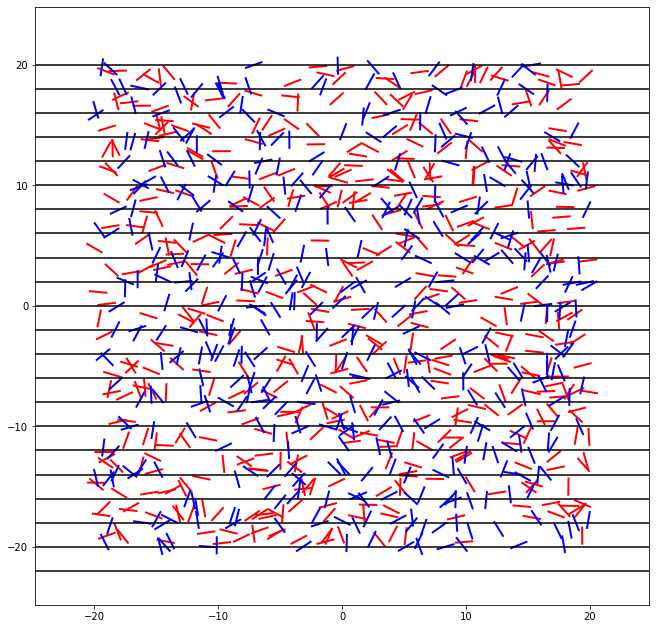

In [13]:
buffon(1000,2,1.5,100000)